EDA: Exploratory Data Analsis

In [127]:
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK
import seaborn as sns # a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [128]:
df = pd.read_csv('salary_data_cleaned.csv')

In [129]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,spark,aws,excel,job_state,same_state,age,python_yn,r_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,0,0,1,NM,0,49,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,0,0,0,MD,0,38,1,0


In [130]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [131]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [132]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [133]:
df['seniority'] = df['Job Title'].apply(seniority)

In [134]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [135]:
#  Fix state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [136]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'spark', 'aws', 'excel', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')

In [137]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
MI      6
DE      6
KY      6
GA      6
CT      5
IA      5
NE      4
LA      4
OR      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [138]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [139]:
# Competitor Count
df['num_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0) 

In [140]:
df['num_of_Competitors']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [141]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [142]:
df[df.hourly == 1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,job_state,same_state,age,python_yn,r_yn,job_simp,seniority,desc_len,num_of_Competitors
165,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,...,0,PA,0,5,0,0,na,na,2117,0
177,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,DE,1,87,0,0,na,na,2724,0
197,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,...,0,TX,0,45,0,0,na,na,5160,0
202,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,DE,0,87,0,0,na,na,2801,0
210,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,...,0,LA,0,92,0,0,na,na,9322,0
246,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,...,0,PA,0,5,0,0,na,na,2117,0
271,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,DE,1,87,0,0,na,na,2724,0
337,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,...,0,TX,0,45,0,0,na,na,5160,0
345,Clinical Laboratory Scientist,$24-$39 Per Hour(Glassdoor est.),POSITION PURPOSE:\nPerforms CLIA moderate and ...,3.7,Vail Health\n3.7,"Vail, CO","Vail, CO",501 to 1000 employees,1966,Hospital,...,0,CO,1,56,0,0,na,na,1945,0
357,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,DE,0,87,0,0,na,na,2801,0


In [143]:
df[df.hourly == 1][['min_salary','max_salary']]

,min_salary,max_salary
165,17,24
177,21,34
197,18,25
202,21,34
210,15,25
246,17,24
271,21,34
337,18,25
345,24,39
357,21,34


In [144]:
# Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)

In [145]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [146]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'spark', 'aws', 'excel', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'job_simp', 'seniority', 'desc_len',
       'num_of_Competitors'],
      dtype='object')

In [147]:
# remove the \n for the job description
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [148]:
df['company_txt']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [149]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,spark,aws,excel,same_state,age,python_yn,r_yn,desc_len,num_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.225067,0.237197,0.522911,0.557951,48.456873,0.528302,0.002695,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.417908,0.425651,0.499812,0.496965,53.900445,0.499535,0.051882,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,0.000000,0.000000,1.000000,1.000000,26.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,0.000000,0.000000,1.000000,1.000000,61.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,278.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

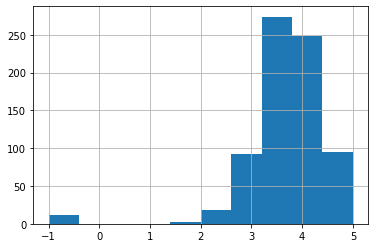

In [150]:
df.Rating.hist()

<AxesSubplot:>

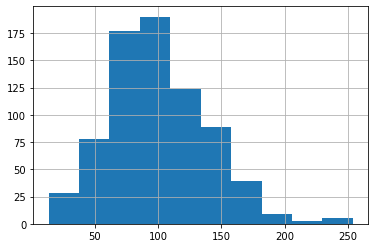

In [151]:
df.avg_salary.hist()

<AxesSubplot:>

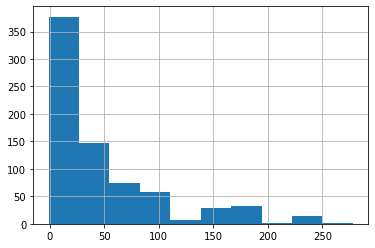

In [152]:
df.age.hist()

<AxesSubplot:>

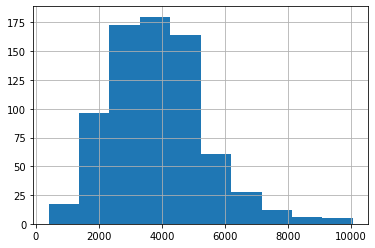

In [153]:
df.desc_len.hist()

<AxesSubplot:>

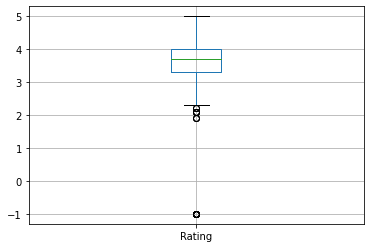

In [154]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

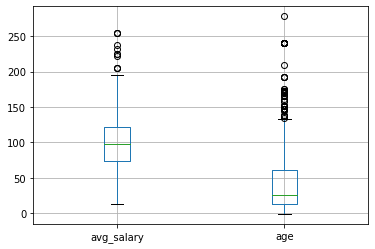

In [155]:
df.boxplot(column = ['avg_salary', 'age'])

In [156]:
df[['avg_salary', 'age', 'Rating', 'desc_len']].corr()

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,0.019492,0.013492,0.078808
age,0.019492,1.000000,0.024665,0.164461
Rating,0.013492,0.024665,1.000000,-0.012281
desc_len,0.078808,0.164461,-0.012281,1.000000


<AxesSubplot:>

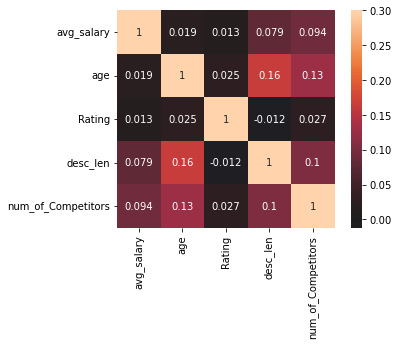

In [157]:
sns.heatmap(df[['avg_salary', 'age', 'Rating', 'desc_len','num_of_Competitors']].corr(), vmin=None, vmax=0.3, cmap=None, center=0, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=True, xticklabels='auto', yticklabels='auto')

In [158]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'spark', 'aws', 'excel', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'job_simp', 'seniority', 'desc_len',
       'num_of_Competitors'],
      dtype='object')

In [159]:
# Graphs of Catagorical Data
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'spark', 'aws', 'excel','seniority','job_simp']]

Graph for Location total = 200


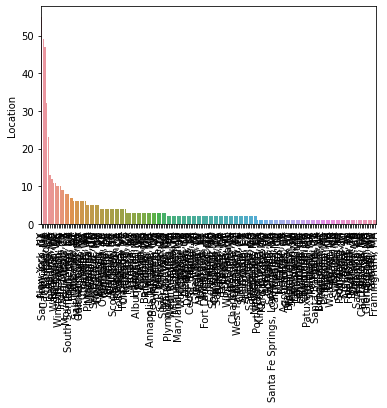

Graph for Headquarters total = 198


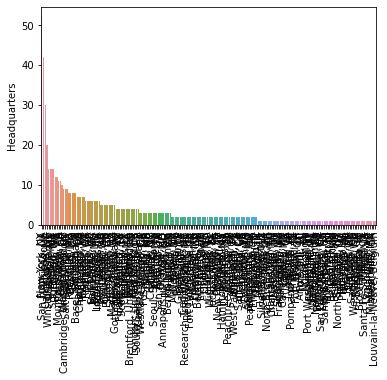

Graph for Size total = 9


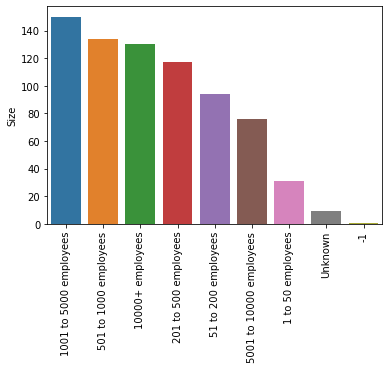

Graph for Type of ownership total = 11


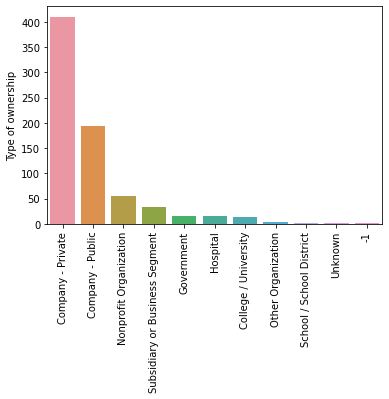

Graph for Industry total = 60


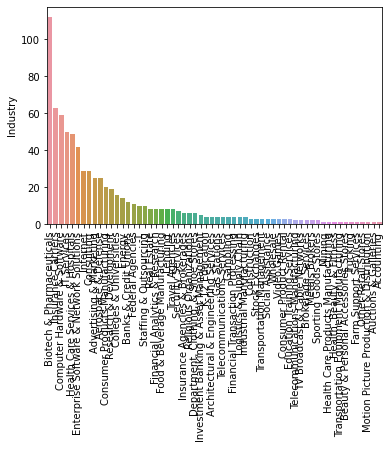

Graph for Sector total = 25


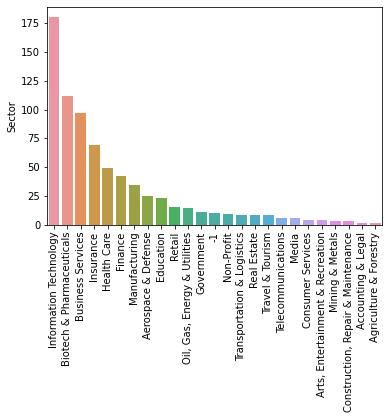

Graph for Revenue total = 14


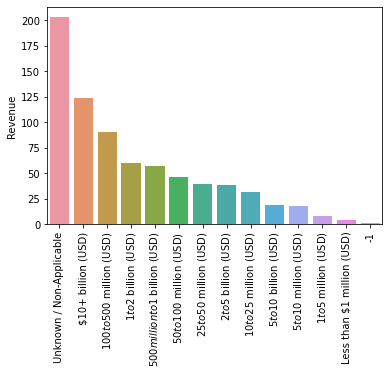

Graph for company_txt total = 343


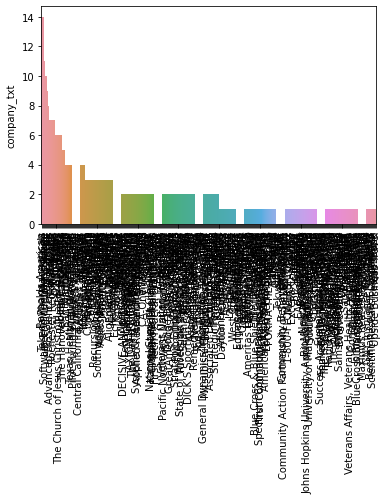

Graph for job_state total = 37


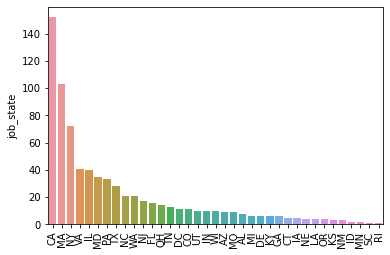

Graph for spark total = 2


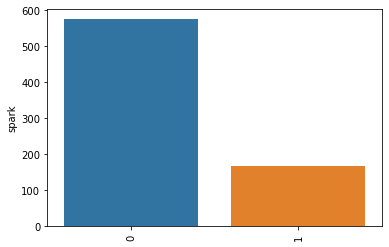

Graph for aws total = 2


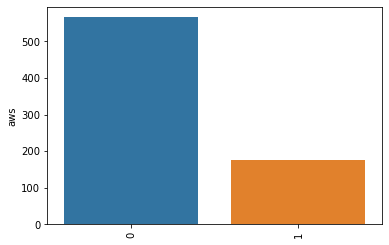

Graph for excel total = 2


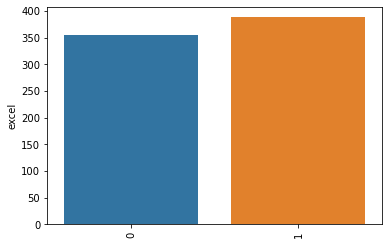

Graph for seniority total = 3


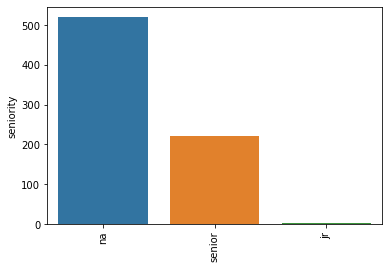

Graph for job_simp total = 7


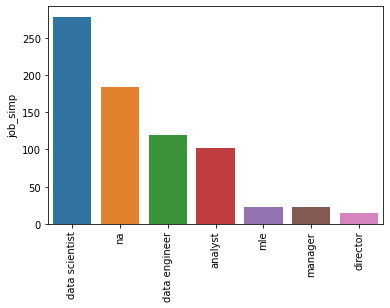

In [160]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)     
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()      

Graph for Location total = 20


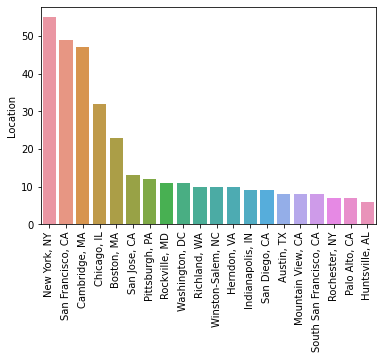

Graph for Headquarters total = 20


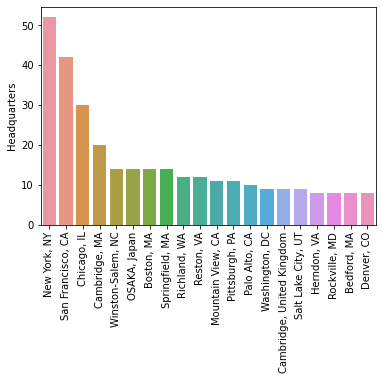

Graph for company_txt total = 20


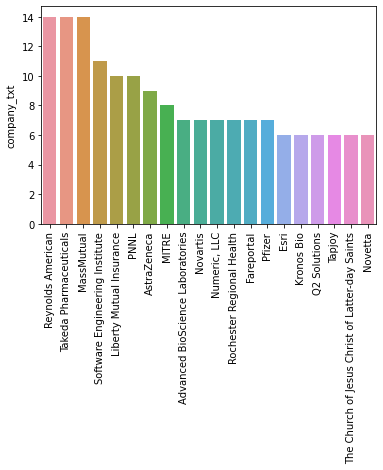

In [161]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)     
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()      

In [162]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [163]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [164]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [165]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,job_simp,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [166]:
# To display all rows
pd.options.display.max_rows
pd.set_option('display.max_rows' , None)

In [167]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,job_simp,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [168]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        mle             177.300000
          manager          80.611111
          na               99.907407
          data engineer   129.540000
          analyst          85.250000
          data scientist  142.522059
CO        analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          mle             100.500000
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        data engineer    91.833333
          data scientist   97.357143
          analyst          47.500000
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        na               57.166667
          analyst          66.500000
          data engineer    96.125000
          data scientist  117.233333
          director        221.750000
          mle             133.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
KS        mle              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        manager          71.900000
          director        117.833333
          na              107.478261
          data engineer   107.291667
          analyst          59.125000
          data scientist  113.750000
MD        data scientist  109.115385
          na               88.750000
          analyst          80.666667
          data engineer   109.000000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        na               82.500000
          manager         109.500000
          director        161.500000
          data engineer   112.000000
          data scientist  106.875000
          analyst          83.583333
NM        data scientist   74.333333
NY        analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          mle             125.000000
          na               81.583333
OH        na               91.166667
          analyst          53.875000
          data scientist  105.285714
OR        data scientist   98.500000
          data engineer    73.000000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          mle             120.500000
          na               76.062500
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data scientist  100.730769
          na               41.285714
          data engineer   113.062500
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          mle              87.

In [169]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst                  5
          data engineer            1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           1
          na                       2
CA        mle                      5
          manager                  9
          na                      27
          data engineer           25
          analyst                 18
          data scientist          68
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        data engineer            3
          data scientist           7
          analyst                  6
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        na                       6
          analyst                  3
          data engineer            8
          data scientist          15
          director                 6
          mle                      2
IN        na                       4
          data scientist           2
          data engineer            4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        manager                  5
          director                 6
          na                      46
          data engineer           12
          analyst                  4
          data scientist          30
MD        data scientist          13
          na                      16
          analyst                  3
          data engineer            3
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          manager                  2
          director                 2
          data engineer            2
          data scientist           4
          analyst                  6
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        na                       3
          analyst                  4
          data scientist           7
OR        data scientist           3
          data engineer            1
PA        analyst                  8
          data engineer            1
          data scientist           6
          manager                  3
          mle                      7
          na                       8
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data scientist          13
          na                       7
          data engineer            8
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          18
          mle                 

In [170]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [171]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_of_Competitors', 'hourly', 'employer provided', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [172]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'spark', 'aws', 'excel', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'job_simp', 'seniority', 'desc_len',
       'num_of_Competitors'],
      dtype='object')

In [173]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index =i, values = 'avg_salary'))

Rating
        avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

In [ ]:
# To generate wordcloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
nltk.download('punkt')

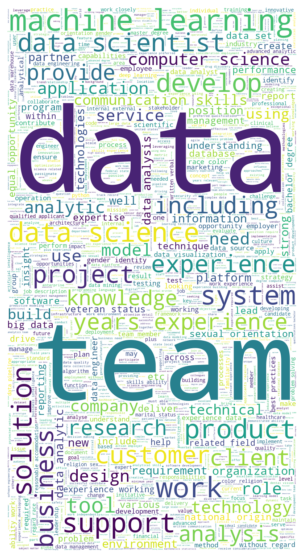

In [177]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()